# <center>Сервисная архитектура и оркестрация приложений
## <center>Монолитная и микросервисная архитектуры. Брокеры и очереди

|Монолитная|Микросервисная|
|-|-|
|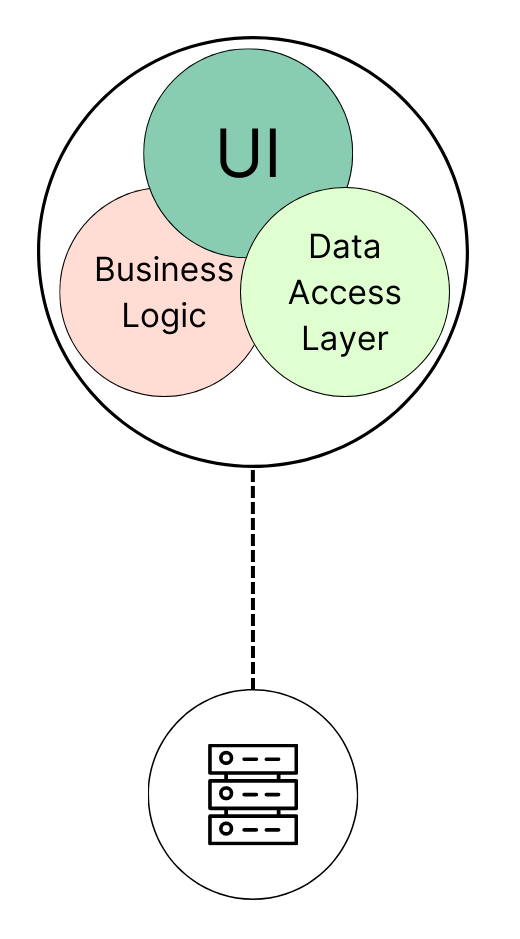|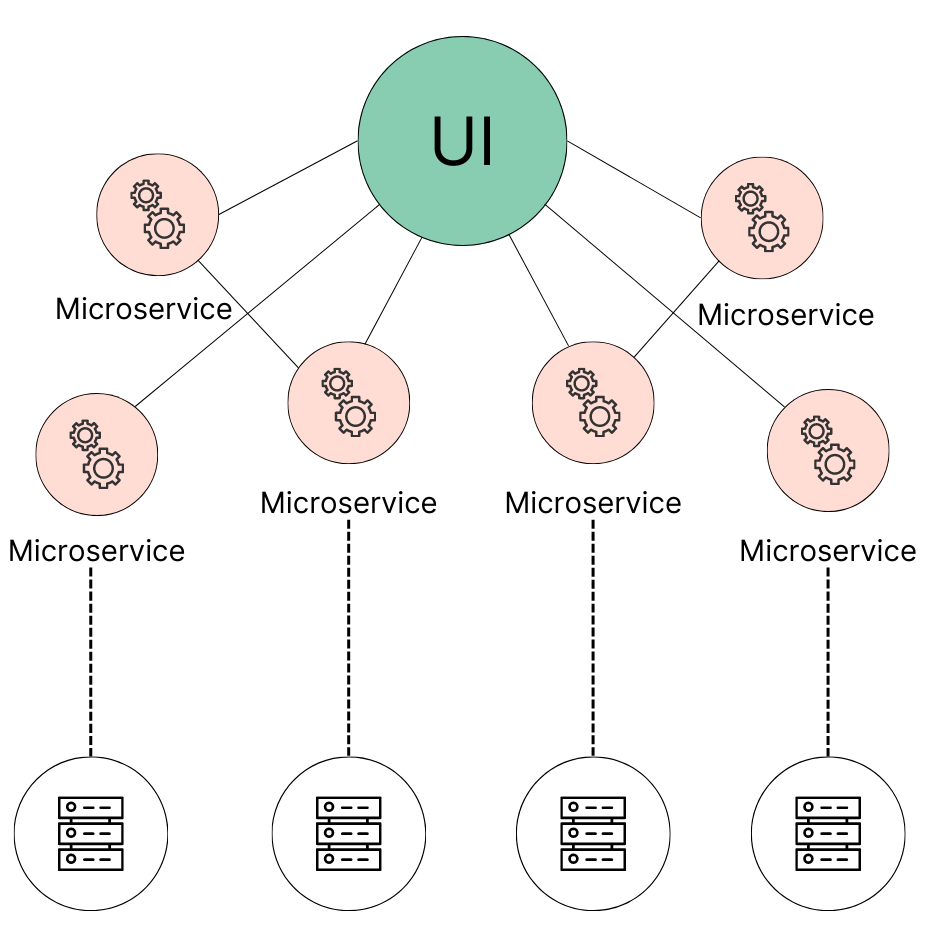|
|При **монолитной архитектуре** контексты приложения запускаются на сервере с помощью внутрипроцессных взаимодействий.<p>Таким образом, приложение включает в себя все функции, и они взаимодействуют в одной запущенной программе, написанной на одном конкретном языке программирования.</p>|**Микросервисная архитектура** — это подход, позволяющий инкапсулировать определённые контексты приложения: то есть каждая функция приложения вынесена в отдельную небольшую программу или сервис.<p>Приложение разделено на небольшие, не зависящие друг от друга компоненты — микросервисы. У каждого из них своя задача, например управлять каталогом, хранить и обновлять содержимое корзины или проводить оплату заказа.</p>|

**ПРЕИМУЩЕСТВА И НЕДОСТАТКИ МИКРОСЕРВИСНОГО ПОДХОДА В РАЗРАБОТКЕ**
|Преимущества|Недостатки|
|-|-|
|Повышение автономности различных частей продукта. Мы можем разрабатывать их раздельно и разными командами (при этом отслеживая версионность).|Сложность разработки из-за наличия различных технологий.|
|Гибкость и масштабируемость. За счёт модульности приложения мы можем масштабировать только ту часть, которая требует дополнительных ресурсов.|Накладные расходы на сериализацию и десериализацию сообщений.|
|Повышение стабильности. Если что-то перестало работать, будет недоступен только один функционал, а не приложение целиком.|Время работы напрямую зависит от взаимодействия сервисов.|
|Горизонтальная масштабируемость. Микросервисы позволяют запускать приложение на разных серверах.||

## <center>Масштабируемость системы
По мере роста и развития приложения, увеличения числа пользователей и данных у команды неизбежно возникают вопросы:
* Как обрабатывать $N$ запросов в секунду? Как уменьшить время обработки одного запроса?
* Как и в чём хранить постоянно увеличивающийся в объёме поток данных от пользователей?
* Как подстраховаться от падения БД (ведь это трата времени и, следовательно, потеря денег)?
* Как добиться высокой степени доступности приложения для всех пользователей?
* Что делать с тяжёлыми запросами, которые могут выполняться часами?

Обобщая эти и подобные вопросы, говорят о **масштабируемости** системы — её способности выдерживать рост нагрузки по мере добавления ресурсов.

При создании действительно крупных приложений существует два подхода:

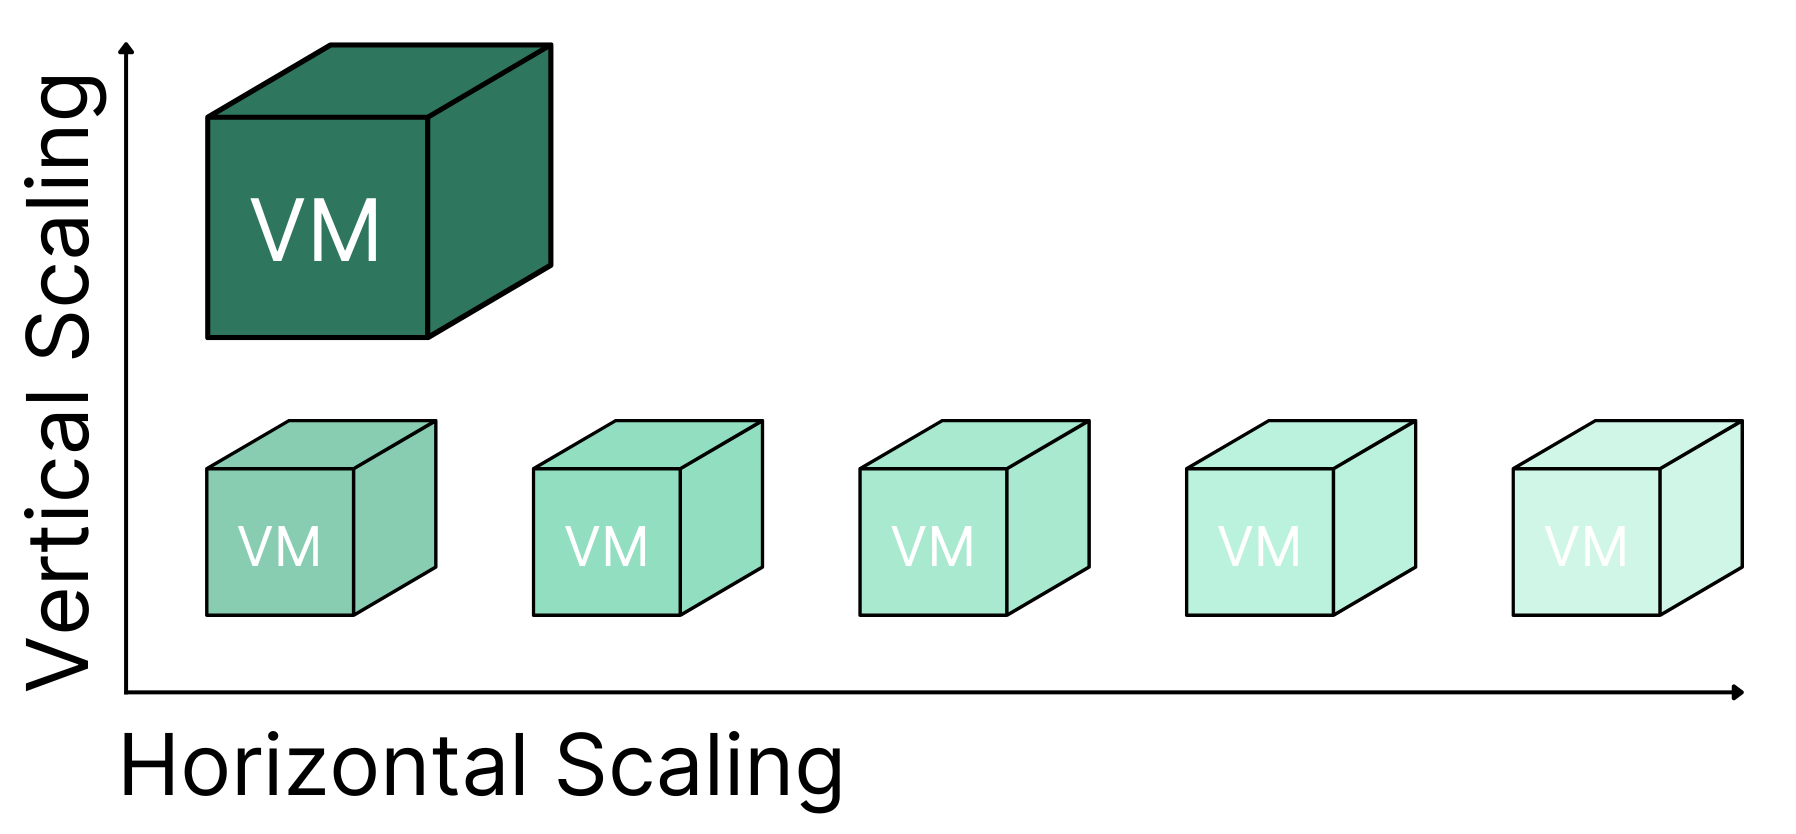

* **Вертикальное масштабирование** (scale up): заменить сервер сервером с большей вместимостью и мощностью. Как вы понимаете, у всего есть предел.
* **Горизонтальное масштабирование** (scale out): добавить ещё один сервер и объединить серверы в кластер.

Идеальный вариант — добиться **линейной зависимости**, то есть сделать так, чтобы при добавлении ресурсов приложение выдерживало прямо пропорциональный рост нагрузки. Однако такое встречается редко из-за неоптимальной работы разных частей системы: так, добавление дополнительного сервера, обрабатывающего запросы, может увеличить параметр максимальной нагрузки в два раза, а вот добавление ещё двух серверов вряд ли увеличит этот параметр в четыре раза.

**ЧТО МЫ МОЖЕМ СДЕЛАТЬ ДЛЯ ЛУЧШЕГО МАСШТАБИРОВАНИЯ СИСТЕМЫ?**
1. **Добавить балансировщики нагрузки** перед дублирующими друг друга серверами. Эти балансировщики будут отправлять запросы на те серверы, на которых нагрузка меньше, чем на остальных.

    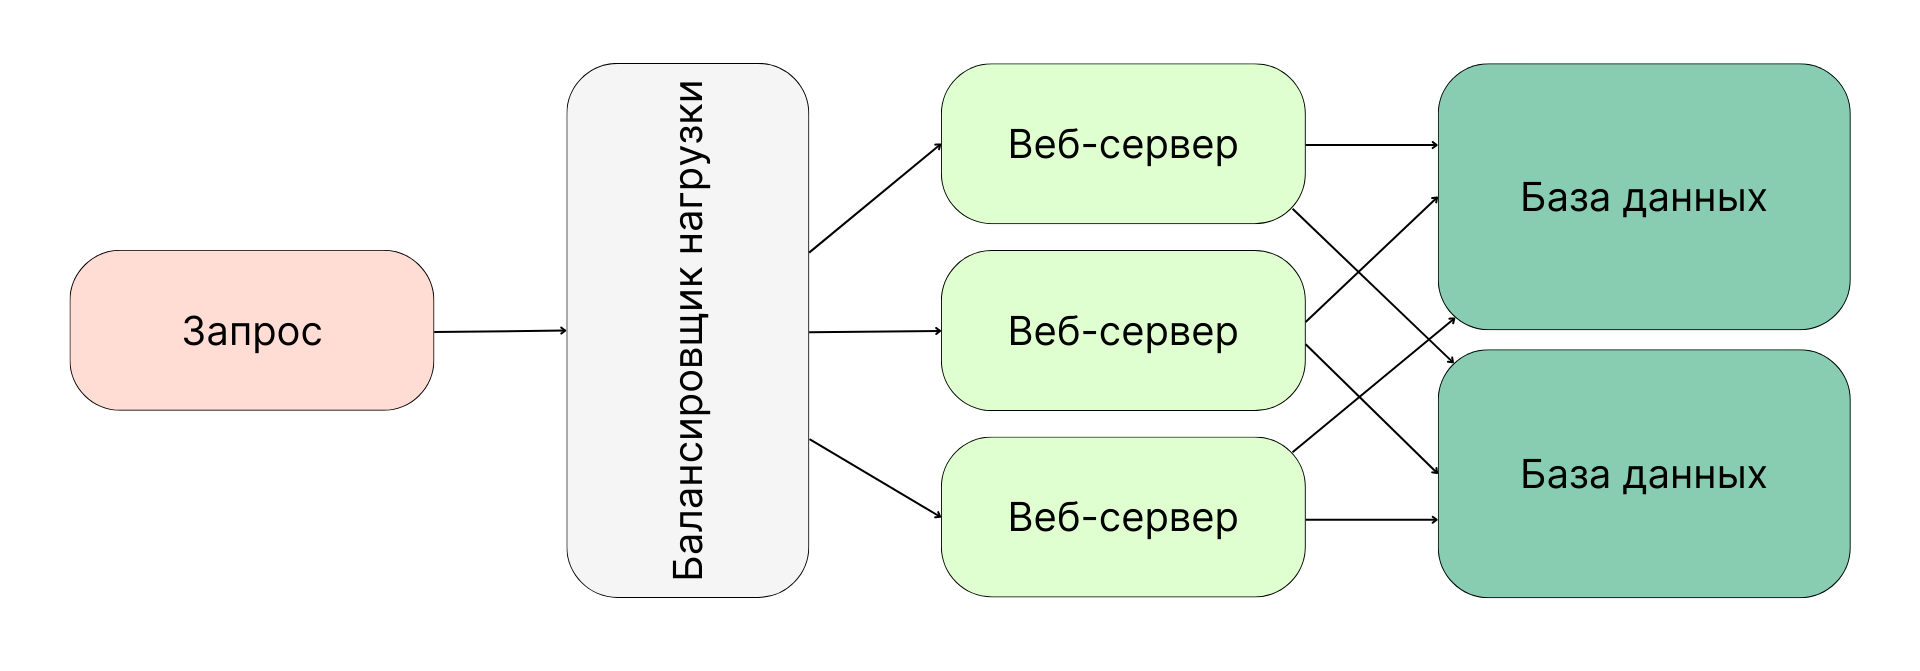

2. **Добавить кэш** — быстрый «буфер» между базой данных и приложением. В таком случае диспетчер сначала проверит в кэше, не выполнялся ли аналогичный запрос раньше, и только потом направит его на сервер.

    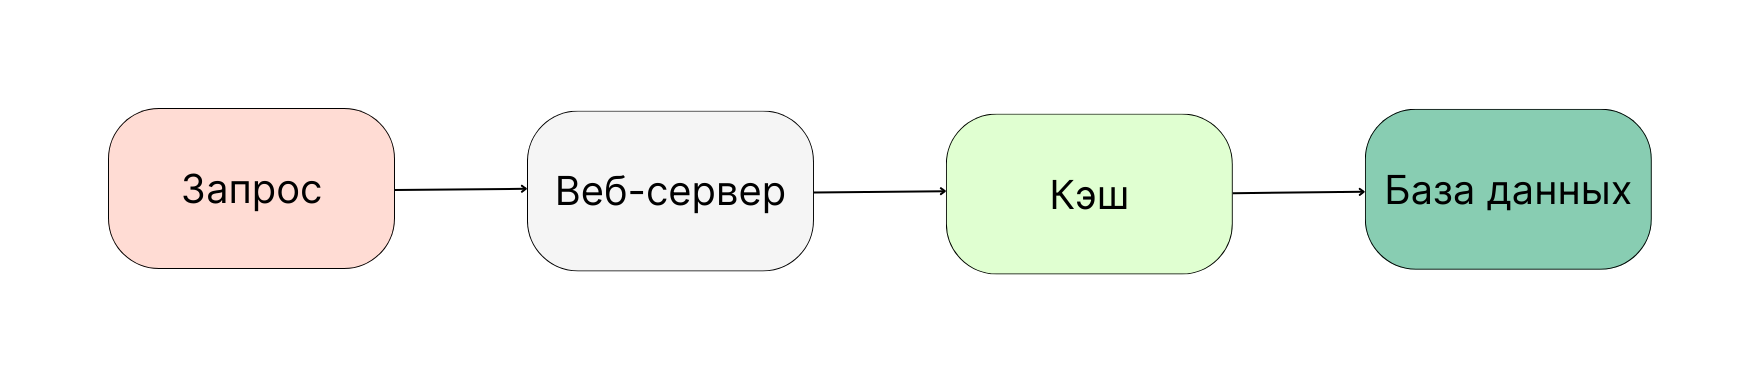

3. **Оптимизировать работу БД:**
* скопировать БД, чтобы застраховаться от её падения;
* денормализовать* данные, чтобы все поля содержались в одной таблице — так мы избежим дополнительной нагрузки на объединение данных;
* оптимизировать SQL-запросы, повысив скорость их обработки.

    >Под **нормализацией** в базах данных понимается разбиение данных на отдельные таблицы в целях сведения информации о каждой сущности в отдельную таблицу: например, есть таблица с заказами, которая ссылается на таблицы с информацией о товарах, пользователях, пунктах выдачи и т. д.

    >Под **денормализацией** понимается сведение информации обо всех пользователях в одну таблицу: например, в таблице с заказами хранится сразу вся информация о товарах, пользователях, пунктах выдачи и т. д.

4. **Добавить асинхронные очереди сообщений** между частями системы.

    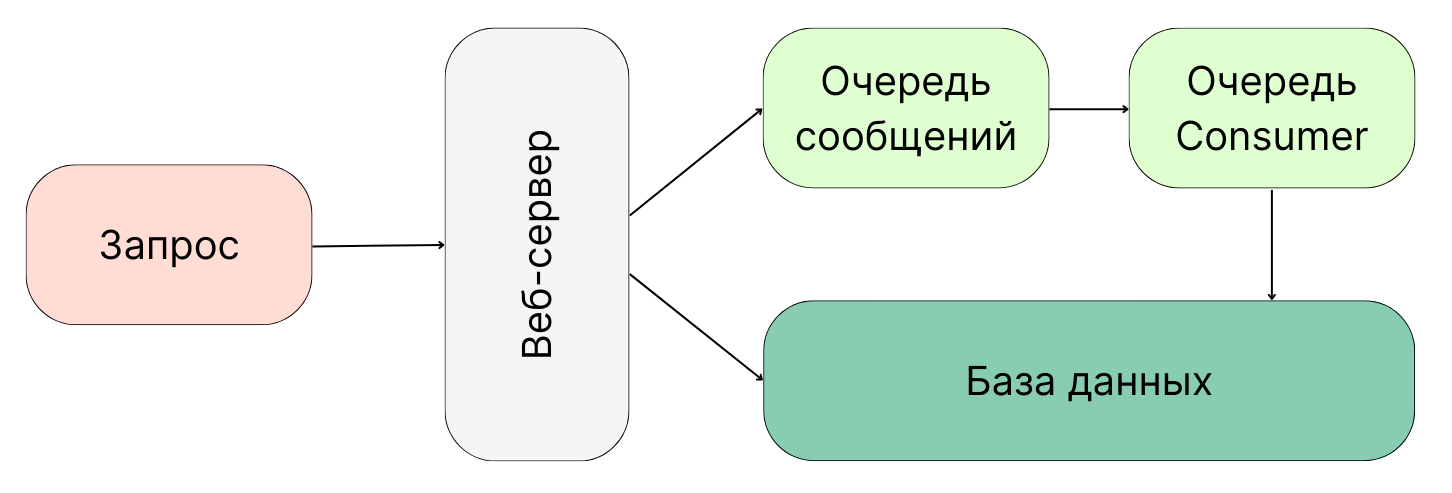

**КОГДА ИСПОЛЬЗОВАТЬ МИКРОСЕРВИСНУЮ АРХИТЕКТУРУ?**
* **Большие коллективы.**

    Микросервисы позволяют группам разработчиков не задумываться о синхронизации каждого шага: каждая команда может работать над одним или несколькими микросервисами и использовать свои инструменты.

    Новые фичи можно разрабатывать параллельно и запускать по мере готовности.

* **Объёмные проекты со сложной архитектурой.**

    Обновлять и поддерживать отдельные модули крупных систем намного проще, чем контролировать, как изменения скажутся на системе в целом.

* **Продукты с резко меняющимся трафиком.**

    Если вашим продуктом начинают чаще пользоваться в период праздников или распродаж, микросервисы позволят вам быстро масштабироваться и уменьшить риск отказа системы. Кроме того, вам не придётся платить за дополнительную инфраструктуру, которая нужна только в периоды пиковых нагрузок.

* **Приложения, требующие частых обновлений.**

    Достаточно изменить и отладить только тот модуль, который вы хотите обновить. Это существенно сокращает время разработки и приближает релиз.




## <center>ВЗАИМОДЕЙСТВИЕ МЕЖДУ СЕРВИСАМИ
Типы организации взаимодействия сервисов:

|Синхронный|Асинхронный|
|-|-|
|<p>Один сервис обращается к другому и ожидает ответа.</p><p>Для организации синхронного взаимодействия используется протокол *HTTP* или *HTTPS*. Сервисы обмениваются данными через *HTTP*-запросы.</p><p>Разработка и отладка просты, однако сервис должен быть постоянно доступен — в противном случае обмен сообщениями остановится.</p>|<p>Сервисы взаимодействуют между собой путём передачи сообщений. Таким образом, сервис не ожидает ответ, а продолжает работу. Нужный сервис принимает сообщение и начинает его обработку.</p><p>Для организации асинхронного взаимодействия используются очереди сообщений. О них мы поговорим ниже.</p>|

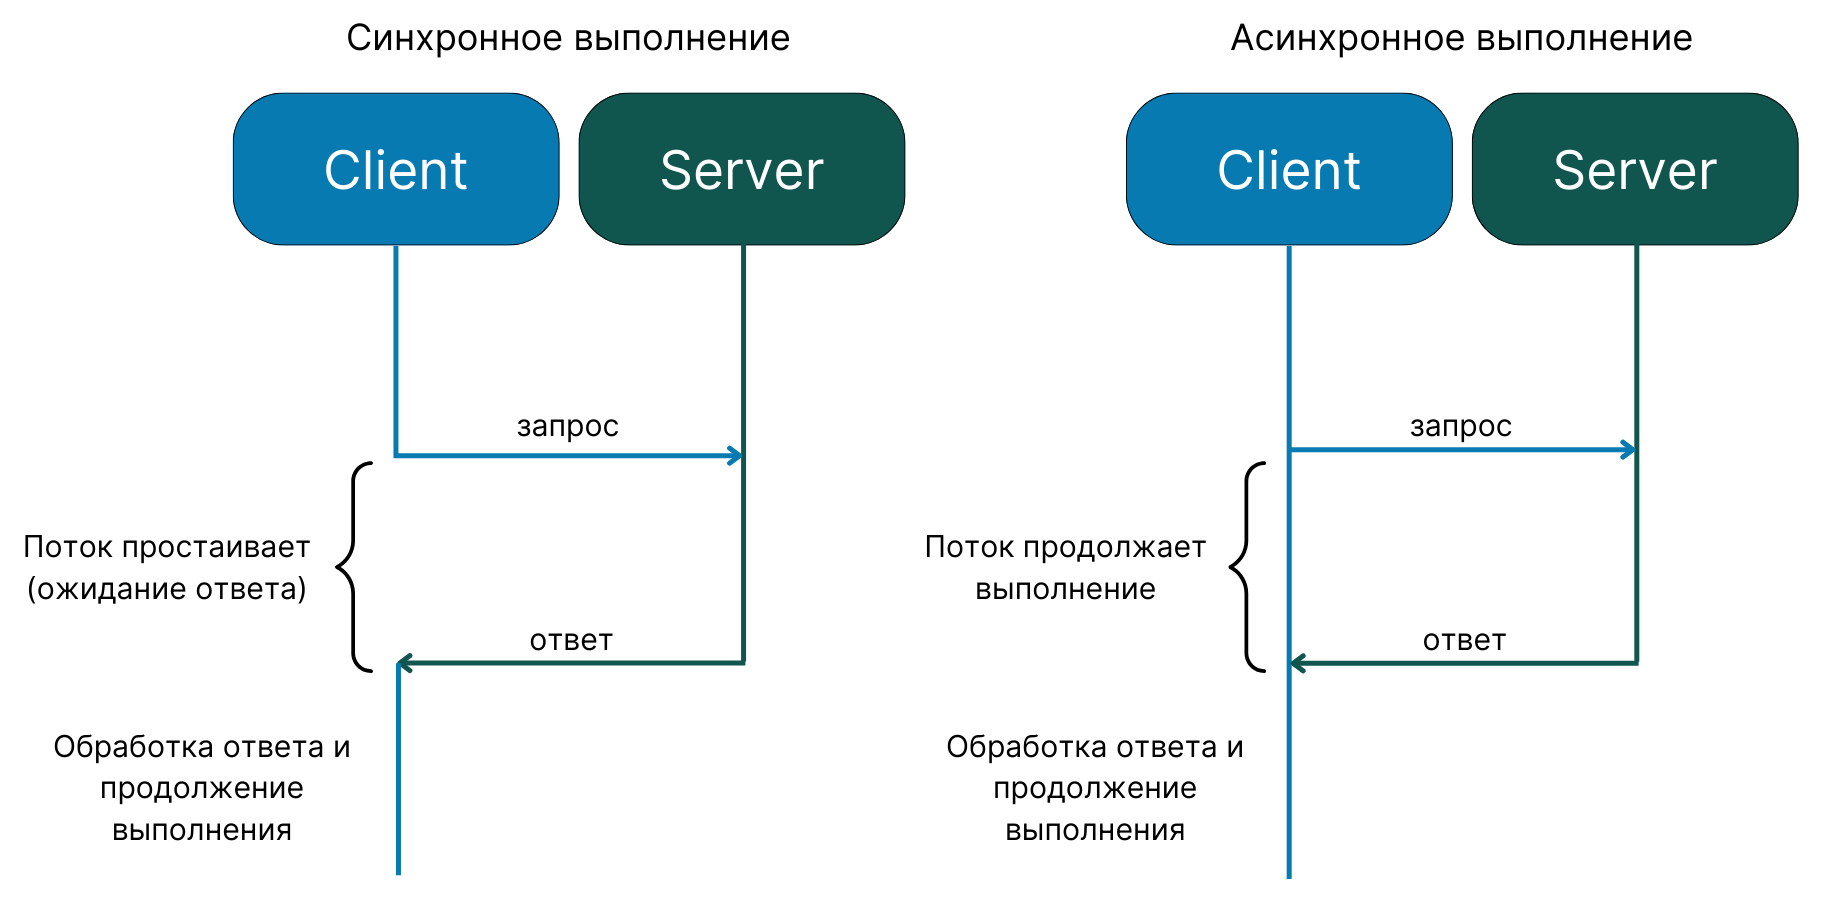

## <center>БРОКЕРЫ СООБЩЕНИЙ
Брокеры сообщений (также их называют **диспетчеры очереди**) помогают организовать межсистемный обмен сообщениями и являются связующим звеном между различными процессами в приложениях.

Как правило, в таких системах используется паттерн проектирования **«издатель → очередь → подписчик»** (*producer → queue → consumer*). Под издателем и подписчиком здесь можно понимать всё что угодно (например, микросервисы или целые приложения), то есть это абстрактные понятия, не привязанные к конкретной реализации.

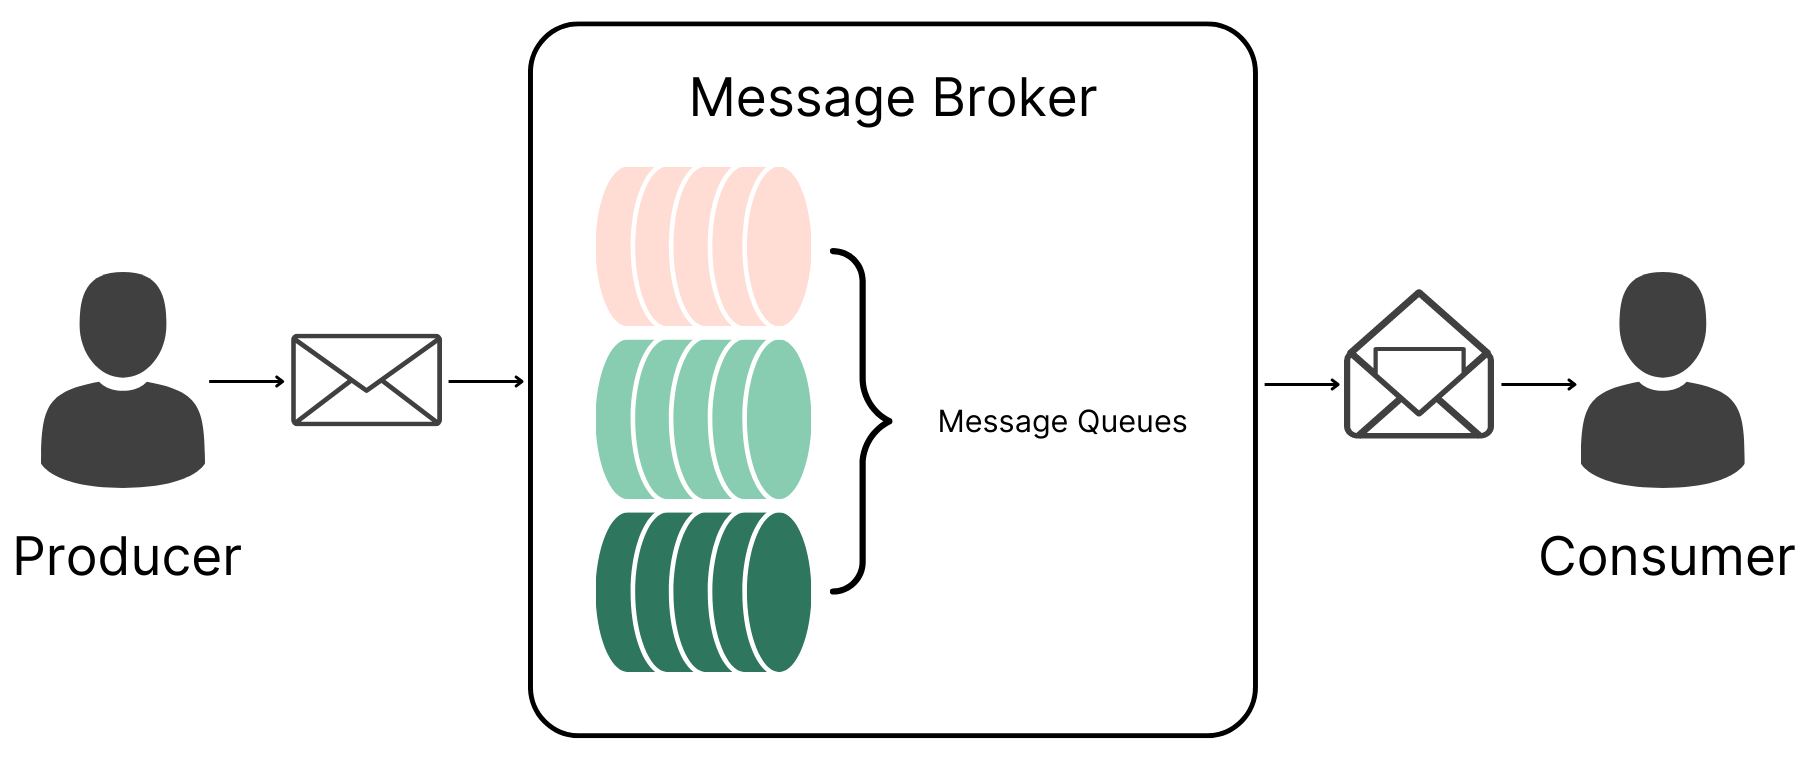

Чтобы обеспечить хранение сообщений в очереди до момента их прочтения получателем, доступ к очереди должен быть асинхронным.

Структура данных очереди представлена следующими правилами:
* первым «читается» сообщение, пришедшее первым;
* новые элементы добавляются только в конец очереди;
* чтение и удаление происходит только из начала очереди.

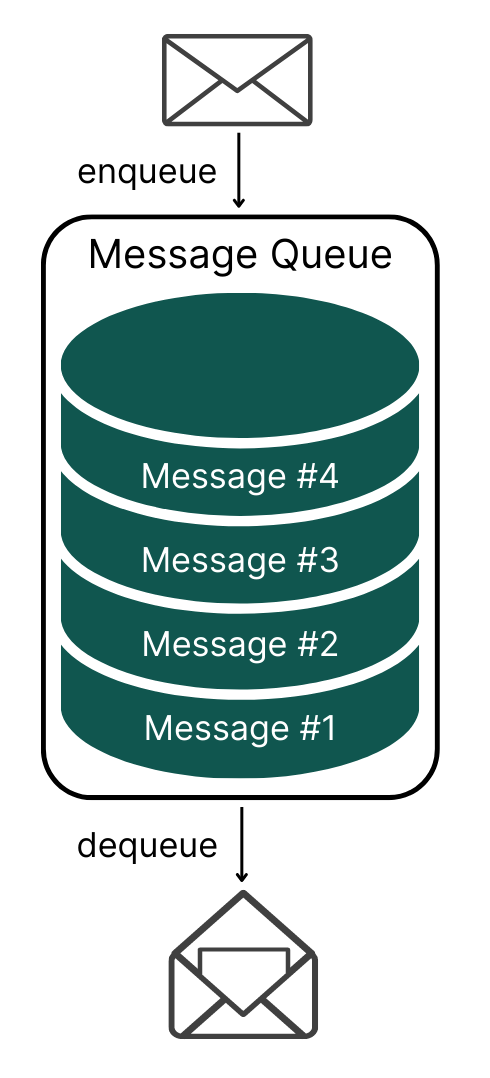

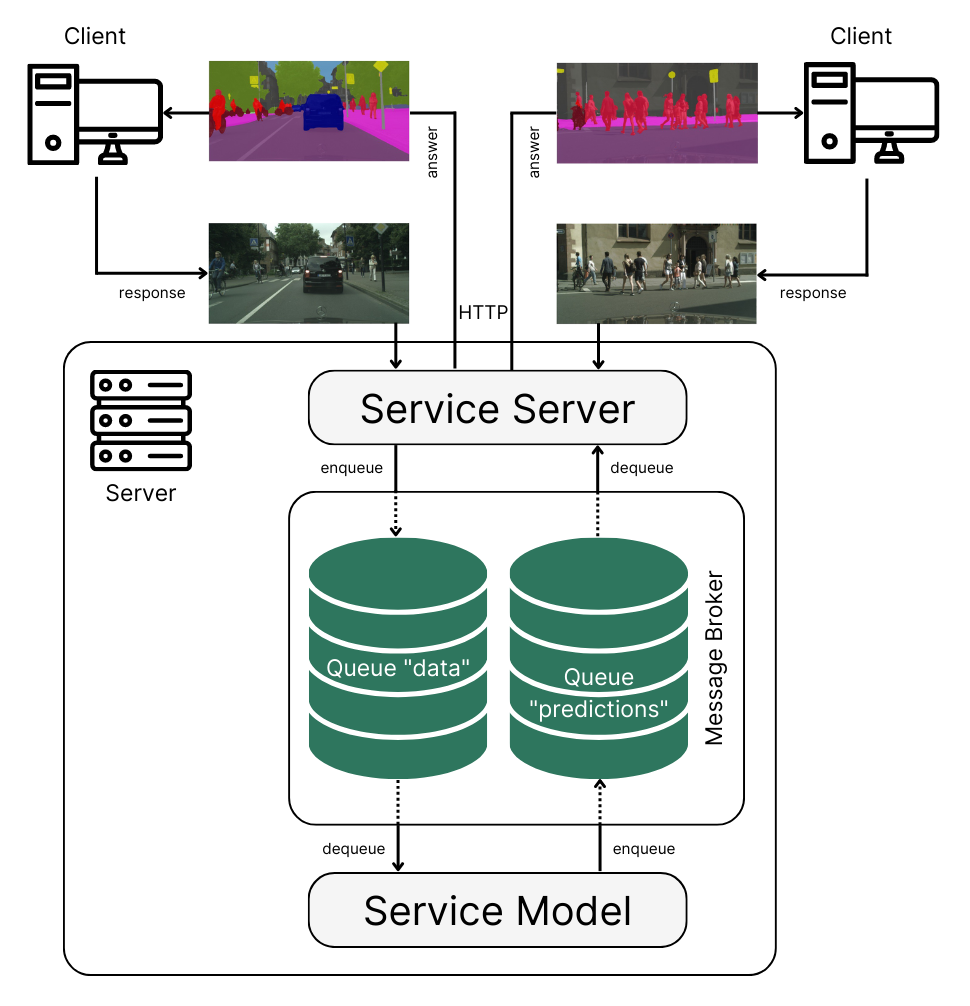

Наиболее популярны следующие программные реализации очереди:
* RabbitMQ,
* Apache Kafka,
* ActiveMQ.


# <center>Организация взаимодействия через очереди. *RabbitMQ*
